# Task 1: Retrieving and Preparing the Data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_p = "buddymove_holidayiq.csv" # Load the Data

In [3]:
data = pd.read_csv(data_p, sep=',', decimal='.', header=0)

In [4]:
data.info() # Get the basic infomation of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User Id    249 non-null    object
 1   Sports     249 non-null    int64 
 2   Religious  249 non-null    int64 
 3   Nature     249 non-null    int64 
 4   Theatre    249 non-null    int64 
 5   Shopping   249 non-null    int64 
 6   Picnic     249 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.7+ KB


In [5]:
data.isnull().sum() # Check for missing values

User Id      0
Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64

In [6]:
data.describe() # Get an overview of the dataset

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


In [7]:
data.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [8]:
categories = data.columns[1:] 
categories

Index(['Sports', 'Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic'], dtype='object')

In [9]:
columns = data[categories]
columns.shape

(249, 6)

In [10]:
user_num = data['User Id']
user_num.shape

(249,)

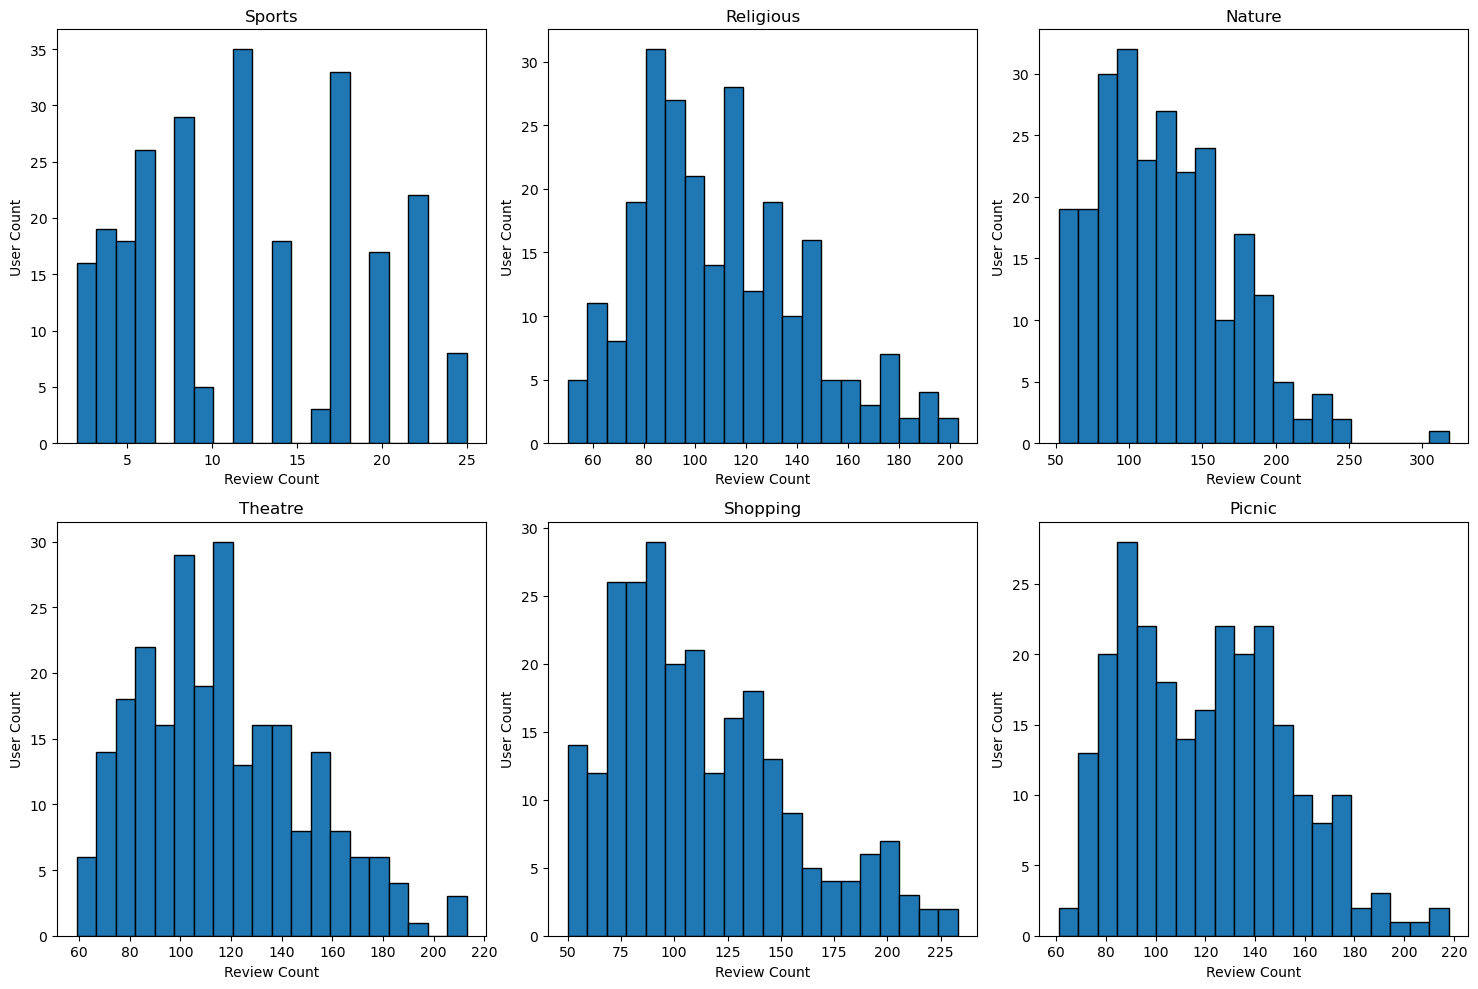

In [11]:
plt.figure(figsize=(15, 10)) #check for the data outliers
for i, category in enumerate(categories):
    plt.subplot(2, 3, i+1)  
    plt.hist(data[category], bins=20, edgecolor='black')
    plt.title(category)
    plt.xlabel('Review Count')
    plt.ylabel('User Count')
plt.tight_layout()
plt.show()
# Reference：https://stackoverflow.com/questions/20174468/how-to-create-subplots-of-pictures-made-with-the-hist-function-in-matplotlib-p

# Task 2: Data Exploration

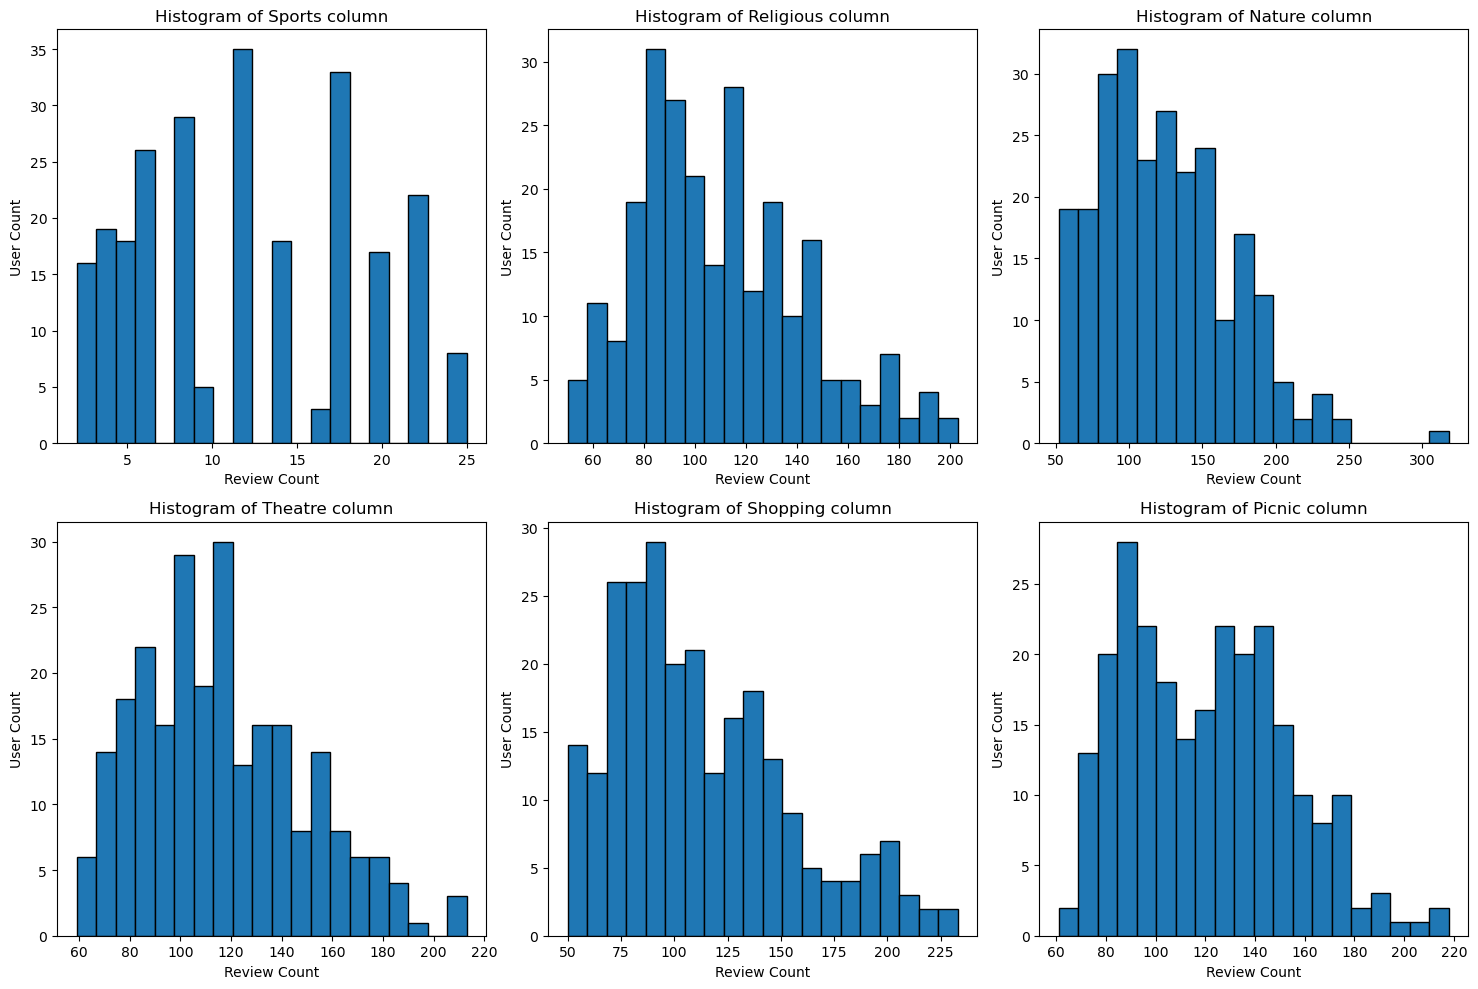

In [12]:
plt.figure(figsize=(15, 10)) #Explore each column by using histogram
for i, category in enumerate(categories):
    plt.subplot(2, 3, i+1)  
    plt.hist(data[category], bins=20, edgecolor='black')
    plt.title(f'Histogram of {category} column')
    plt.xlabel('Review Count')
    plt.ylabel('User Count')
plt.tight_layout()
plt.show()

In [13]:
data.describe() #Explore each column's value details by checking their distribution of values

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


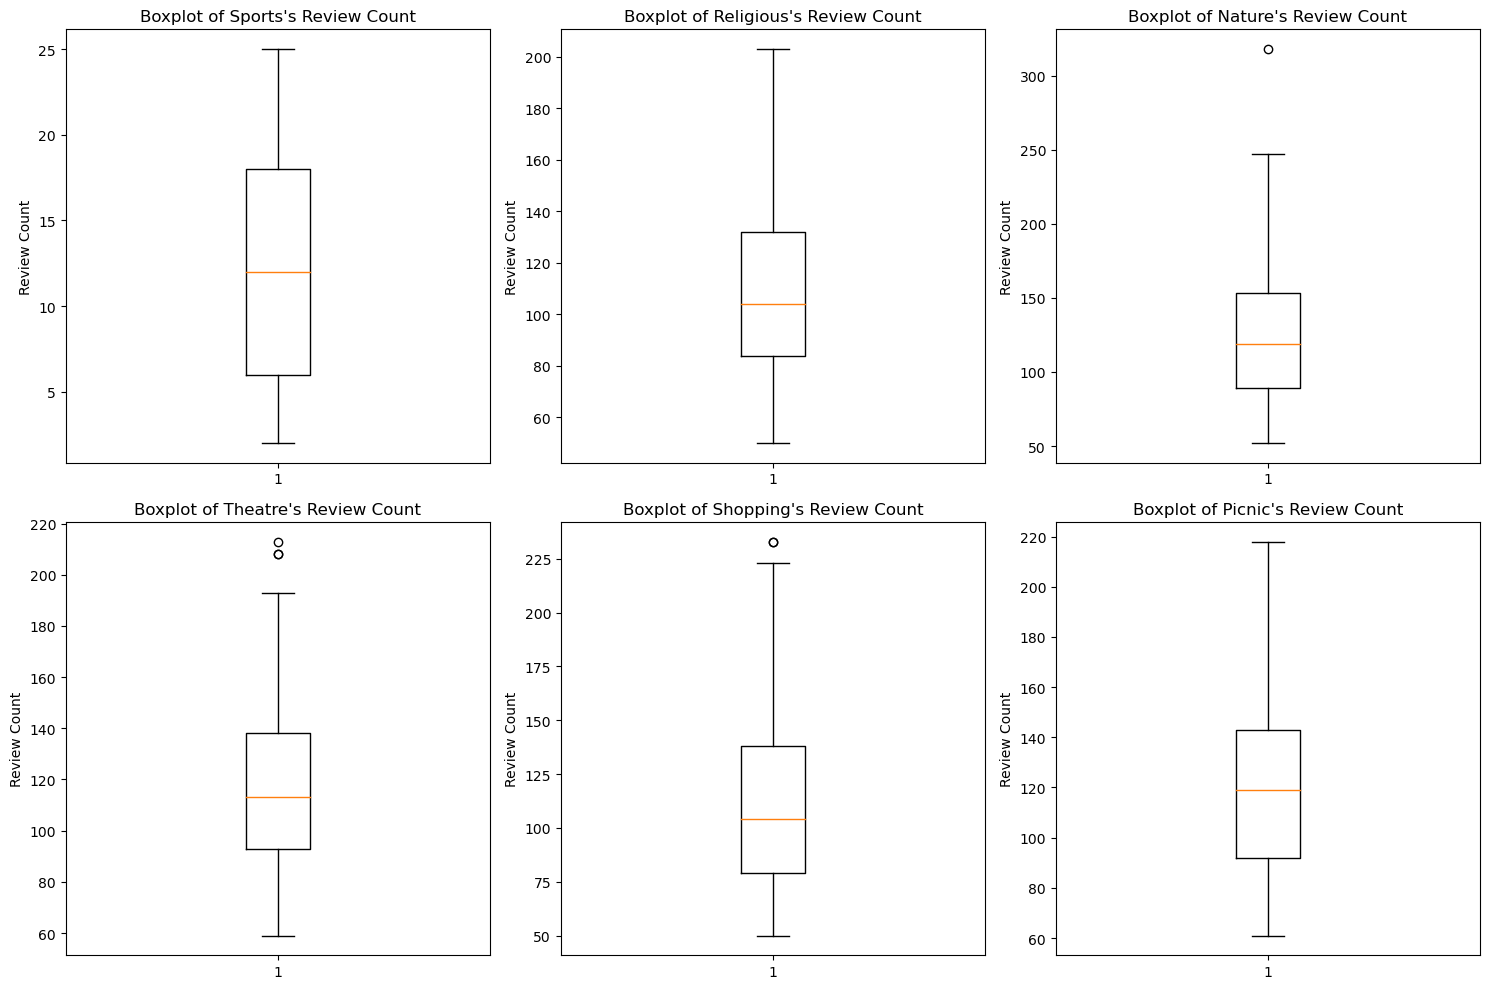

In [14]:
plt.figure(figsize=(15, 10)) #Explore each column by using boxplot
for i, category in enumerate(categories):
    plt.subplot(2, 3, i+1) 
    plt.boxplot(data[category])
    plt.title(f'Boxplot of {category}\'s Review Count')
    plt.ylabel('Review Count')
plt.tight_layout()
plt.show()

In [15]:
from pandas.plotting import scatter_matrix

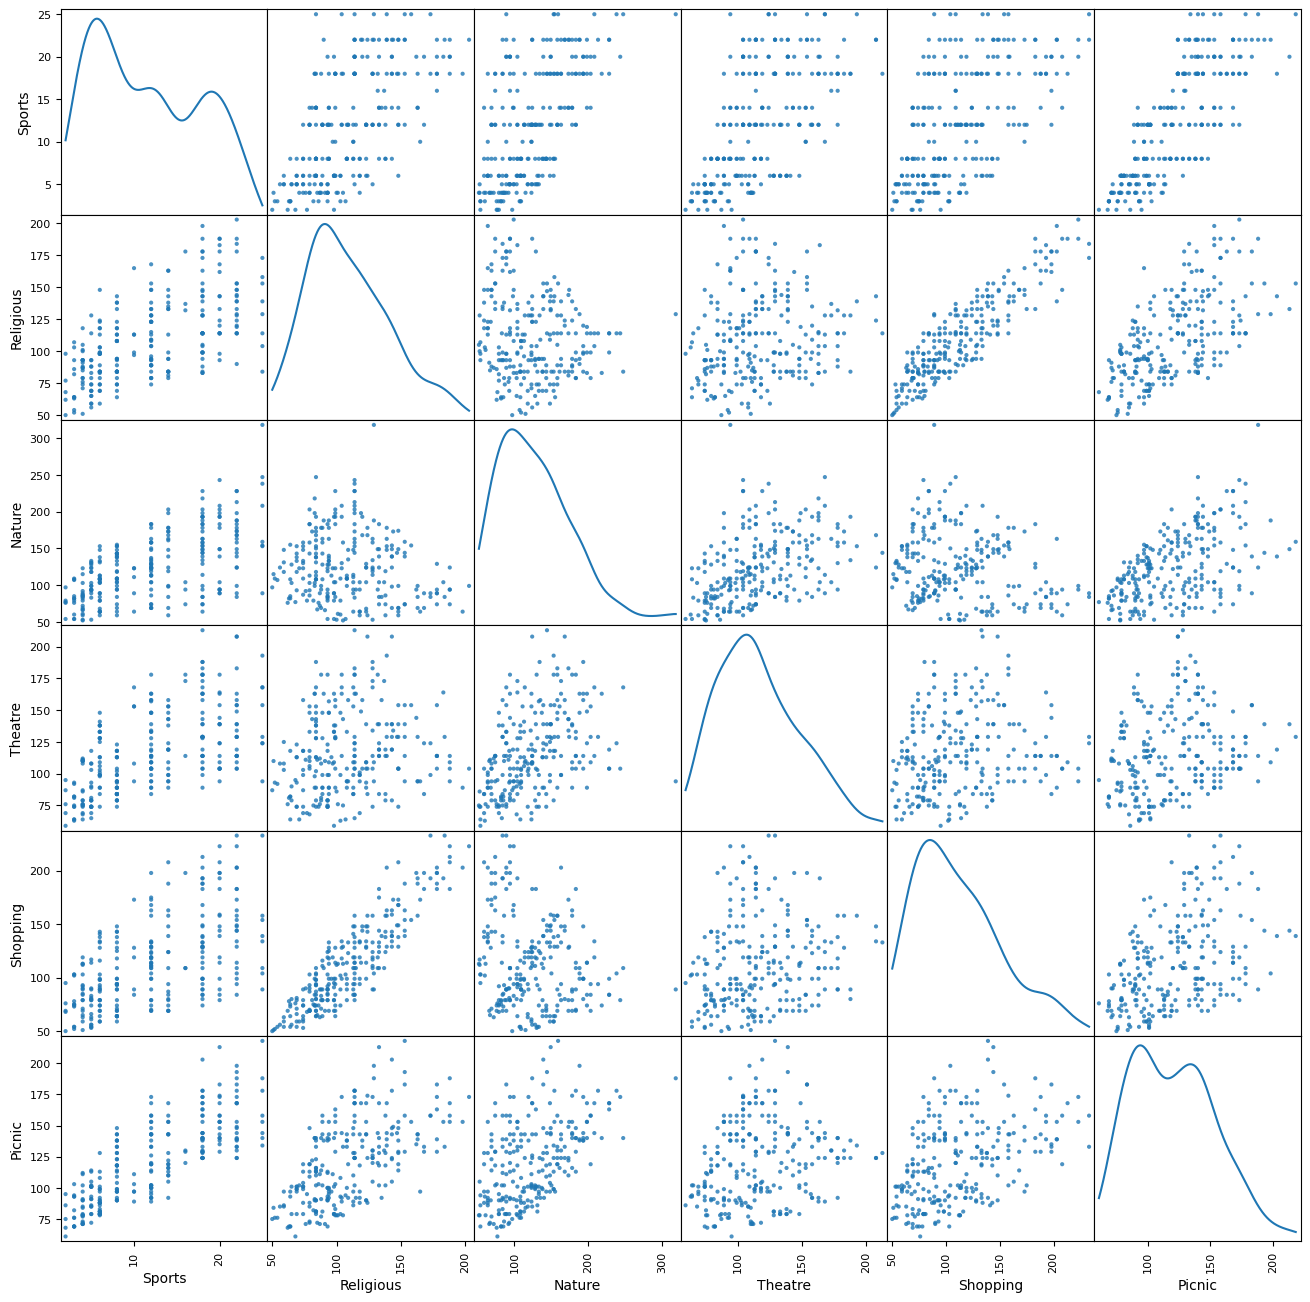

In [16]:
#Explore the relationship between all pairs of attributes
fig = scatter_matrix(data,alpha=0.8,figsize=(16,16),diagonal='density') 
plt.show()
#Reference: Practical 03-2022.pdf from Canvas

# Task 3: Data Modeling by Using Two Classification Models

## Task 3.1.1 KNN model: Feature Selecting

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
# Define a column as Target
data['Shopping_Target'] = [1 if x > data['Shopping'].mean() else 0 for x in data['Shopping']]
data['Shopping_Target']   # transfrom number into two categories: 1 for higher interest, 0 for lower interest

0      0
1      0
2      0
3      0
4      0
      ..
244    1
245    0
246    1
247    1
248    1
Name: Shopping_Target, Length: 249, dtype: int64

In [19]:
X = data[['Sports', 'Religious', 'Nature', 'Theatre', 'Picnic']]
y = data['Shopping_Target']

In [20]:
# Transfer to array
X =np.array(X)
y = np.array(y)
X.shape, y.shape

((249, 5), (249,))

In [21]:
# Generating Train/Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4)
print('X_train.shape: ',X_train.shape,'X_test.shape: ',X_test.shape,'y_trian.shape: ',y_train.shape,'y_test.shape: ',y_test.shape)

X_train.shape:  (174, 5) X_test.shape:  (75, 5) y_trian.shape:  (174,) y_test.shape:  (75,)


In [22]:
# hillclimbing
from sklearn.utils import shuffle

In [23]:
new_Ind=[]
cur_MaxScore = 0.0
col_num = 5
col_Ind_Random = shuffle(range(col_num), random_state=1)
y_test,X

(array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 0]),
 array([[  2,  77,  79,  69,  95],
        [  2,  62,  76,  76,  68],
        [  2,  50,  97,  87,  75],
        ...,
        [ 20, 124, 178, 104, 174],
        [ 20, 133, 149, 139, 213],
        [ 20, 143, 149, 139, 143]]))

In [24]:
for cur_f in range(0, col_num):
                    new_Ind.append(col_Ind_Random[cur_f])
                    newData = X[:, new_Ind]
                    X_train, X_test, y_train, y_test = train_test_split(newData,y, test_size=0.3, random_state=0)
                    clf = KNeighborsClassifier(3)
                    fit = clf.fit(X_train, y_train)
                    cur_Score = clf.score(X_test, y_test)
                    if cur_Score < cur_MaxScore:
                          new_Ind.remove(col_Ind_Random[cur_f])
                    else:
                          cur_MaxScore = cur_Score
                          print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("There are " + str(len(new_Ind)) + " features selected:")
print(new_Ind)

Score with 1 selected features: 0.5333333333333333
Score with 2 selected features: 0.8666666666666667
Score with 3 selected features: 0.9333333333333333
Score with 4 selected features: 0.9333333333333333
There are 4 features selected:
[2, 1, 4, 0]


In [25]:
# use the selected features modeling 
X = data[['Sports', 'Religious', 'Nature', 'Picnic']]
y = data['Shopping_Target']
# Transfer to array
X =np.array(X)
y = np.array(y)
X.shape, y.shape

((249, 4), (249,))

In [26]:
# Generating Train/Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4)
print('X_train.shape: ',X_train.shape,'X_test.shape: ',X_test.shape,'y_trian.shape: ',y_train.shape,'y_test.shape: ',y_test.shape)

X_train.shape:  (174, 4) X_test.shape:  (75, 4) y_trian.shape:  (174,) y_test.shape:  (75,)


## Task 3.1.2 Select Model: KNeighbors Model

### 3.1.2.1 weight = uniform, p =2

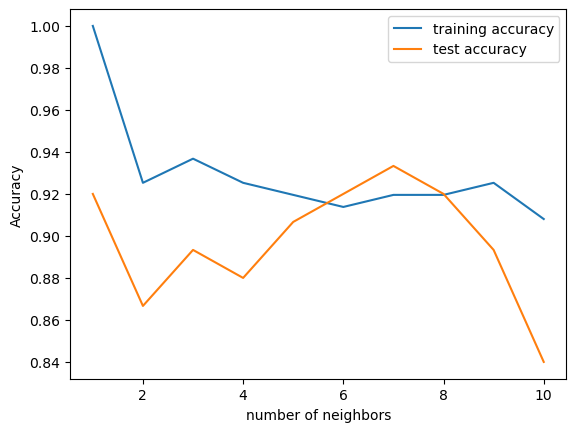

In [27]:
# Find the best K value
training_accuracy =[]
test_accuracy = []
neighbors = range(1,11)
for n in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = n)
    KNN.fit(X_train, y_train)
    training_accuracy.append(KNN.score(X_train,y_train))
    test_accuracy.append(KNN.score(X_test,y_test))
plt.plot(neighbors,training_accuracy,label='training accuracy')
plt.plot(neighbors,test_accuracy,label='test accuracy')    
plt.ylabel('Accuracy')
plt.xlabel('number of neighbors')
plt.legend()
# In this case, we can see the best value would be k = 7
# Reference: https://www.youtube.com/watch?v=zUIO1G3X6X8

In [28]:
# Build the k-nearest neighbour classifier ： weight = uniform, p=2
clf = KNeighborsClassifier(7)

In [29]:
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print(cm)
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[[42  1]
 [ 4 28]]
[Train/test split] score: 0.93333


In [30]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.97      0.88      0.92        32

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



In [31]:
# K-Folds Cross-Validation
from sklearn.model_selection import KFold

In [32]:
kf = KFold(n_splits=5,shuffle=True,random_state=4)

In [33]:
for train_index, test_index in kf.split(X):
             print("TRAIN:", train_index, "TEST:", test_index)
             X_train, X_test = X[train_index], X[test_index]
             y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   2   3   4   5   7   8   9  10  12  15  16  17  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  34  35  36  37  38  40  41  44  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  72  73  74  75  76  78  79  80  81  82  84  85  86  87  89  94
  95  96  97  98 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 122 123 124 125 126 127 128 129 130 131 132
 133 135 136 137 138 140 141 143 145 147 148 149 150 151 152 154 156 157
 158 160 161 162 164 165 166 167 168 170 171 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 190 191 192 193 194 196 197 198 199
 200 201 202 203 204 205 206 209 210 211 212 213 215 216 217 218 219 221
 223 224 225 226 227 228 229 231 232 233 237 240 242 243 244 245 246 247
 248] TEST: [  1   6  11  13  14  18  33  39  42  43  45  46  47  48  70  71  77  83
  88  90  91  92  93  99 121 134 139 142 144 146 153 155 159 163 169 172
 189 195 207 208 214 220 222 230

In [34]:
for k, (train_index, test_index) in enumerate(kf.split(X)):
             X_train, X_test = X[train_index], X[test_index]
             y_train, y_test = y[train_index], y[test_index]
             clf.fit(X_train, y_train)
             print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.92000
[fold 1] score: 0.92000
[fold 2] score: 0.82000
[fold 3] score: 0.92000
[fold 4] score: 0.85714


### 3.1.2.2 weights =distance, p=2

In [35]:
# using weight = distance to classifier:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((174, 4), (75, 4), (174,), (75,))

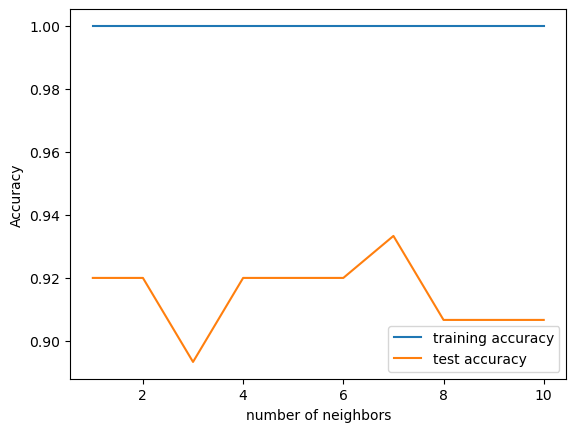

In [36]:
# Find the best K value
training_accuracy =[]
test_accuracy = []
neighbors = range(1,11)
for n in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = n, weights='distance')
    KNN.fit(X_train, y_train)
    training_accuracy.append(KNN.score(X_train,y_train))
    test_accuracy.append(KNN.score(X_test,y_test))
plt.plot(neighbors,training_accuracy,label='training accuracy')
plt.plot(neighbors,test_accuracy,label='test accuracy')    
plt.ylabel('Accuracy')
plt.xlabel('number of neighbors')
plt.legend()
# In this case, we can see the best value would be k = 7

In [37]:
# Build the k-nearest neighbour classifier ： weight = distance, p=2
clf = KNeighborsClassifier(7, weights='distance')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print(cm)
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[[42  1]
 [ 4 28]]
[Train/test split] score: 0.93333


In [38]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.97      0.88      0.92        32

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



In [39]:
# K-Folds Cross-Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=4)
for k, (train_index, test_index) in enumerate(kf.split(X)):
             X_train, X_test = X[train_index], X[test_index]
             y_train, y_test = y[train_index], y[test_index]
             clf.fit(X_train, y_train)
             print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.94000
[fold 1] score: 0.92000
[fold 2] score: 0.84000
[fold 3] score: 0.94000
[fold 4] score: 0.87755


### 3.1.2.3 weights = uniform, p =1

In [40]:
# using weight = uniform, p =1 to classifier:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((174, 4), (75, 4), (174,), (75,))

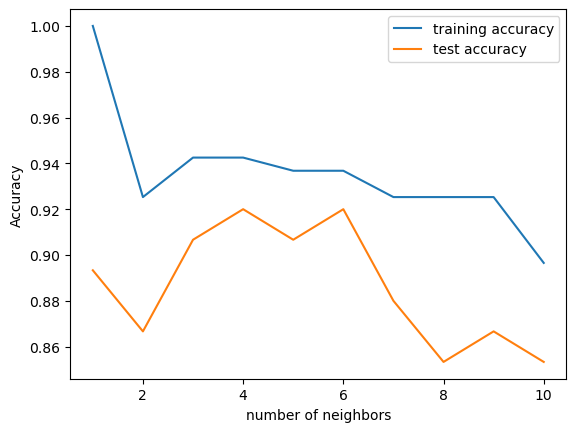

In [41]:
# Find the best K value
training_accuracy =[]
test_accuracy = []
neighbors = range(1,11)
for n in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = n, p=1)
    KNN.fit(X_train, y_train)
    training_accuracy.append(KNN.score(X_train,y_train))
    test_accuracy.append(KNN.score(X_test,y_test))
plt.plot(neighbors,training_accuracy,label='training accuracy')
plt.plot(neighbors,test_accuracy,label='test accuracy')    
plt.ylabel('Accuracy')
plt.xlabel('number of neighbors')
plt.legend()
# In this case, we can see the best value would be k = 4

In [42]:
# Build the k-nearest neighbour classifier ： weight = uniform, p=1
clf = KNeighborsClassifier(4, p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print(cm)
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[[43  0]
 [ 6 26]]
[Train/test split] score: 0.92000


In [43]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.81      0.90        32

    accuracy                           0.92        75
   macro avg       0.94      0.91      0.92        75
weighted avg       0.93      0.92      0.92        75



In [44]:
# K-Folds Cross-Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=4)
for k, (train_index, test_index) in enumerate(kf.split(X)):
             X_train, X_test = X[train_index], X[test_index]
             y_train, y_test = y[train_index], y[test_index]
             clf.fit(X_train, y_train)
             print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.90000
[fold 1] score: 0.94000
[fold 2] score: 0.92000
[fold 3] score: 0.86000
[fold 4] score: 0.87755


### 3.1.2.4 weights = distance, p =1

In [45]:
# using weight = distance, p =1 to classifier:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((174, 4), (75, 4), (174,), (75,))

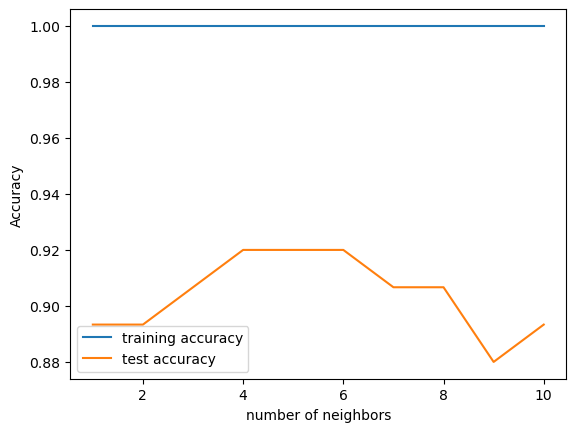

In [46]:
# Find the best K value
training_accuracy =[]
test_accuracy = []
neighbors = range(1,11)
for n in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = n, weights='distance', p=1)
    KNN.fit(X_train, y_train)
    training_accuracy.append(KNN.score(X_train,y_train))
    test_accuracy.append(KNN.score(X_test,y_test))
plt.plot(neighbors,training_accuracy,label='training accuracy')
plt.plot(neighbors,test_accuracy,label='test accuracy')    
plt.ylabel('Accuracy')
plt.xlabel('number of neighbors')
plt.legend()
# In this case, we can see the best value would be k = 4

In [47]:
# Build the k-nearest neighbour classifier ： weight = distance, p=1
clf = KNeighborsClassifier(4, weights='distance',p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print(cm)
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[[42  1]
 [ 5 27]]
[Train/test split] score: 0.92000


In [48]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        43
           1       0.96      0.84      0.90        32

    accuracy                           0.92        75
   macro avg       0.93      0.91      0.92        75
weighted avg       0.92      0.92      0.92        75



In [49]:
# K-Folds Cross-Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=4)
for k, (train_index, test_index) in enumerate(kf.split(X)):
             X_train, X_test = X[train_index], X[test_index]
             y_train, y_test = y[train_index], y[test_index]
             clf.fit(X_train, y_train)
             print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.92000
[fold 1] score: 0.94000
[fold 2] score: 0.88000
[fold 3] score: 0.90000
[fold 4] score: 0.87755


### 3.1.2.5 KNN models: comparing models with different parameter values Conclusion

In [50]:
# by using KNN to modeling data, the best parameters value would be weights = 'uniform', p = 2, k = 7

In [51]:
# use the selected features modeling 
X = data[['Sports', 'Religious', 'Nature', 'Picnic']]
y = data['Shopping_Target']
# Transfer to array
X =np.array(X)
y = np.array(y)
# Generating Train/Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4)
clf = KNeighborsClassifier(7)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print(cm)
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))
print(classification_report(y_test, y_pre))

[[42  1]
 [ 4 28]]
[Train/test split] score: 0.93333
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.97      0.88      0.92        32

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



## Task 3.2 Model: Decision Tree

## Task 3.2.1 Decision Tree model: Feature Selecting

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
data['Shopping_Target'] = [1 if x > data['Shopping'].mean() else 0 for x in data['Shopping']]
data['Shopping_Target']   # transfrom number into two categories: 1 for higher interest, 0 for lower interest

0      0
1      0
2      0
3      0
4      0
      ..
244    1
245    0
246    1
247    1
248    1
Name: Shopping_Target, Length: 249, dtype: int64

In [54]:
X = data[['Sports', 'Religious', 'Nature', 'Theatre', 'Picnic']]
y = data['Shopping_Target']
X = np.array(X)
y = np.array(y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((174, 5), (75, 5), (174,), (75,))

In [56]:
# hill climbing
new_Ind = []
cur_MaxScore = 0.0
col_num = 5
col_Ind_Random = shuffle(range(col_num), random_state=1)

In [57]:
for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.3, random_state=0)
    clf = DecisionTreeClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print(f"Score with {len(new_Ind)} selected features: {cur_Score}")

print(f"There are {len(new_Ind)} features selected:")
print(new_Ind)

Score with 1 selected features: 0.5733333333333334
Score with 2 selected features: 0.92
Score with 3 selected features: 0.92
Score with 4 selected features: 0.92
There are 4 features selected:
[2, 1, 4, 3]


In [58]:
# use the selected features modeling 
X = data[['Religious', 'Nature', 'Theatre','Picnic']]
y = data['Shopping_Target']
# Transfer to array
X =np.array(X)
y = np.array(y)
X.shape, y.shape

((249, 4), (249,))

In [59]:
# Generating Train/Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4)
print('X_train.shape: ',X_train.shape,'X_test.shape: ',X_test.shape,'y_trian.shape: ',y_train.shape,'y_test.shape: ',y_test.shape)

X_train.shape:  (174, 4) X_test.shape:  (75, 4) y_trian.shape:  (174,) y_test.shape:  (75,)


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
# choose parameter values
criteria = ['gini', 'entropy']
max_depths = [None, 5, 10, 20, 30]
min_samples_splits = [2, 3, 5, 10]
min_samples_leafs = [2, 4, 6]
max_features_options = [None, 'sqrt', 'log2']
max_leaf_nodes_options = [None, 3, 5, 10, 20, 30]
best_params = {}
best_accuracy = 0

In [62]:
# create a loop to find the best parameter values
for criterion in criteria:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits:
            for min_samples_leaf in min_samples_leafs:
                for max_features in max_features_options:
                    for max_leaf_nodes in max_leaf_nodes_options:
                        clf = DecisionTreeClassifier(
                            criterion=criterion,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_features=max_features,
                            max_leaf_nodes=max_leaf_nodes,
                            random_state=4
                        )
                        clf.fit(X_train, y_train)
                        y_pred = clf.predict(X_test)
                        accuracy = accuracy_score(y_test, y_pred)
                        
                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                            best_params = {
                                'criterion': criterion,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf,
                                'max_features': max_features,
                                'max_leaf_nodes': max_leaf_nodes
                            }
                        
                        print(f"Params: criterion={criterion}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, max_features={max_features}, max_leaf_nodes={max_leaf_nodes}\nAccuracy: {accuracy}\n")

Params: criterion=gini, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=None, max_leaf_nodes=None
Accuracy: 0.88

Params: criterion=gini, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=None, max_leaf_nodes=3
Accuracy: 0.7866666666666666

Params: criterion=gini, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=None, max_leaf_nodes=5
Accuracy: 0.8666666666666667

Params: criterion=gini, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=None, max_leaf_nodes=10
Accuracy: 0.9066666666666666

Params: criterion=gini, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=None, max_leaf_nodes=20
Accuracy: 0.8666666666666667

Params: criterion=gini, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=None, max_leaf_nodes=30
Accuracy: 0.8666666666666667

Params: criterion=gini, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_leaf_nodes=None
Accura

Params: criterion=gini, max_depth=5, min_samples_split=5, min_samples_leaf=6, max_features=log2, max_leaf_nodes=None
Accuracy: 0.76

Params: criterion=gini, max_depth=5, min_samples_split=5, min_samples_leaf=6, max_features=log2, max_leaf_nodes=3
Accuracy: 0.5866666666666667

Params: criterion=gini, max_depth=5, min_samples_split=5, min_samples_leaf=6, max_features=log2, max_leaf_nodes=5
Accuracy: 0.7466666666666667

Params: criterion=gini, max_depth=5, min_samples_split=5, min_samples_leaf=6, max_features=log2, max_leaf_nodes=10
Accuracy: 0.7733333333333333

Params: criterion=gini, max_depth=5, min_samples_split=5, min_samples_leaf=6, max_features=log2, max_leaf_nodes=20
Accuracy: 0.8533333333333334

Params: criterion=gini, max_depth=5, min_samples_split=5, min_samples_leaf=6, max_features=log2, max_leaf_nodes=30
Accuracy: 0.8533333333333334

Params: criterion=gini, max_depth=5, min_samples_split=10, min_samples_leaf=2, max_features=None, max_leaf_nodes=None
Accuracy: 0.90666666666666

Params: criterion=gini, max_depth=20, min_samples_split=5, min_samples_leaf=6, max_features=None, max_leaf_nodes=10
Accuracy: 0.8666666666666667

Params: criterion=gini, max_depth=20, min_samples_split=5, min_samples_leaf=6, max_features=None, max_leaf_nodes=20
Accuracy: 0.8666666666666667

Params: criterion=gini, max_depth=20, min_samples_split=5, min_samples_leaf=6, max_features=None, max_leaf_nodes=30
Accuracy: 0.8666666666666667

Params: criterion=gini, max_depth=20, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_leaf_nodes=None
Accuracy: 0.7866666666666666

Params: criterion=gini, max_depth=20, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_leaf_nodes=3
Accuracy: 0.5866666666666667

Params: criterion=gini, max_depth=20, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_leaf_nodes=5
Accuracy: 0.7466666666666667

Params: criterion=gini, max_depth=20, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_leaf_nodes=10
Accuracy

Params: criterion=entropy, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_leaf_nodes=20
Accuracy: 0.8

Params: criterion=entropy, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_leaf_nodes=30
Accuracy: 0.8

Params: criterion=entropy, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_leaf_nodes=None
Accuracy: 0.8133333333333334

Params: criterion=entropy, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_leaf_nodes=3
Accuracy: 0.5866666666666667

Params: criterion=entropy, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_leaf_nodes=5
Accuracy: 0.7466666666666667

Params: criterion=entropy, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_leaf_nodes=10
Accuracy: 0.8

Params: criterion=entropy, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_leaf_nodes=20
Accuracy: 0.8

Par

Params: criterion=entropy, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_leaf_nodes=20
Accuracy: 0.84

Params: criterion=entropy, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_leaf_nodes=30
Accuracy: 0.8533333333333334

Params: criterion=entropy, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_leaf_nodes=None
Accuracy: 0.84

Params: criterion=entropy, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_leaf_nodes=3
Accuracy: 0.8

Params: criterion=entropy, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_leaf_nodes=5
Accuracy: 0.8266666666666667

Params: criterion=entropy, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_leaf_nodes=10
Accuracy: 0.8666666666666667

Params: criterion=entropy, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_leaf_nodes=20
Accuracy: 0.84

Params: criter

Params: criterion=entropy, max_depth=30, min_samples_split=3, min_samples_leaf=4, max_features=log2, max_leaf_nodes=20
Accuracy: 0.8

Params: criterion=entropy, max_depth=30, min_samples_split=3, min_samples_leaf=4, max_features=log2, max_leaf_nodes=30
Accuracy: 0.8

Params: criterion=entropy, max_depth=30, min_samples_split=3, min_samples_leaf=6, max_features=None, max_leaf_nodes=None
Accuracy: 0.8

Params: criterion=entropy, max_depth=30, min_samples_split=3, min_samples_leaf=6, max_features=None, max_leaf_nodes=3
Accuracy: 0.8

Params: criterion=entropy, max_depth=30, min_samples_split=3, min_samples_leaf=6, max_features=None, max_leaf_nodes=5
Accuracy: 0.8

Params: criterion=entropy, max_depth=30, min_samples_split=3, min_samples_leaf=6, max_features=None, max_leaf_nodes=10
Accuracy: 0.8133333333333334

Params: criterion=entropy, max_depth=30, min_samples_split=3, min_samples_leaf=6, max_features=None, max_leaf_nodes=20
Accuracy: 0.8

Params: criterion=entropy, max_depth=30, min_sa

In [63]:
print(f"Best parameters: {best_params} with accuracy: {best_accuracy}")

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_leaf_nodes': 10} with accuracy: 0.9066666666666666


In [64]:
# Using the best parameters to modeling
clf_best = DecisionTreeClassifier(**best_params, random_state=4)
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)

print("Final Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("[Train/test split] score: {:.5f}".format(clf_best.score(X_test, y_test)))
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_best))

Final Confusion Matrix:
[[40  3]
 [ 4 28]]
[Train/test split] score: 0.90667

Final Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.90      0.88      0.89        32

    accuracy                           0.91        75
   macro avg       0.91      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75



In [65]:
from sklearn import tree

In [66]:
target_names = ['lower interest', 'higher interest']
features = data[['Religious', 'Nature', 'Theatre','Picnic']].columns

In [67]:
with open('data.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file= f,feature_names=features,
    class_names=target_names, filled=True, rounded=True,
    special_characters=True)